In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as pl
from xgboost import XGBClassifier

### Reading Data

In [25]:
data_train= pd.read_csv('TrainMyriad.csv')
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,Class
0,0.006353,0.012099,0.008836,0.006182,-0.029186,-0.020042,0.000000,-0.045210,0.011838,-0.033426,...,0.002667,-0.005319,-0.001604,-0.001071,-0.010724,0.012466,-0.014989,0.005978,-0.000540,1
1,0.008518,0.000000,0.006888,-0.017510,0.012682,0.007612,0.022258,-0.002622,0.001833,-0.004136,...,0.017926,-0.010008,0.013714,-0.037801,-0.004499,0.007586,-0.022667,0.025406,0.017743,1
2,-0.002749,-0.007983,-0.002683,-0.003074,-0.007709,-0.029132,-0.005001,-0.013168,0.000306,0.016701,...,-0.034084,-0.021786,0.009724,-0.002485,0.010277,-0.002466,-0.007417,-0.022416,0.013376,0
3,-0.006397,-0.008048,0.009736,-0.008437,0.019044,0.009145,0.012608,-0.008171,0.006669,0.003118,...,-0.005309,0.001001,-0.007331,0.001678,0.012064,-0.008609,-0.005344,-0.011081,-0.003056,0
4,-0.002278,-0.021309,0.004666,0.027090,0.026375,-0.028634,-0.009826,0.004580,0.003799,0.024981,...,-0.034297,-0.049443,-0.017582,-0.000746,0.019403,-0.010249,0.008136,-0.011005,0.007418,0


In [3]:
data_test= pd.read_csv('TestMyriad.csv')
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.003050,-0.016344,0.034003,0.014948,-0.003682,-0.000370,0.002588,0.001844,-0.005521,-0.014804,...,0.020638,-0.001379,0.011965,0.009550,-0.003153,-0.002259,0.006341,-3.150315e-03,0.012641,0.006242
1,0.004113,-0.003511,0.004698,0.001753,-0.035006,-0.010278,0.012828,0.001206,0.016265,-0.011263,...,0.018161,0.008055,-0.004566,0.011468,-0.001701,0.003975,0.001697,-1.000000e-10,-0.031056,-0.005245
2,-0.014920,0.008743,-0.012207,-0.017301,0.022133,0.008612,-0.018663,0.006464,0.011980,-0.013424,...,0.013435,0.009120,0.010156,-0.004888,0.008991,0.018372,0.012448,1.461155e-02,0.007025,-0.022846
3,0.005236,-0.006944,0.010490,-0.004325,-0.023458,-0.039146,-0.048148,-0.022374,0.023881,0.027211,...,0.006233,0.013274,-0.005240,-0.000878,0.013181,-0.001735,-0.081668,-3.784295e-03,-0.014245,-0.043353
4,-0.010764,0.023214,-0.012407,-0.005743,0.004332,0.005392,0.012871,0.006354,-0.000000,-0.003508,...,0.009967,0.016148,0.002060,-0.006461,-0.006208,0.005057,-0.004143,-0.000000e+00,-0.022585,-0.015506


### EXTRACTING NEW FEATURES

In [4]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [18]:
# Drop 'class' from dataset train
data_train_no_class = data_train.drop(['Class'], axis=1)
target_train = data_train['Class']

In [157]:
target_train = data_train['Class']

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: Class, Length: 5000, dtype: int64

#### Extracting Features in train data

In [9]:
# Reshaping data
data_t= data_train_no_class.stack()
data_t.index.rename([ 'id', 'time' ], inplace = True )
data_t = data_t.reset_index()

In [11]:
# Extracting features
features_extracted = extract_features(data_t, column_id="id", column_sort="time")
features_extracted

Feature Extraction: 100%|██████████| 10/10 [14:27<00:00, 86.75s/it]


variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.9,0__symmetry_looking__r_0.9500000000000001,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance,0__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,0.112373,5.613844,-0.006190,-0.021716,0.004479,0.028112,0.172990,0.000476,0.000553,0.055371,...,1.0,1.0,-2.730801e-07,7.087675e-07,1.216744e-06,0.0,8.0,0.0,0.000444,0.0
1,0.047288,3.763326,-0.004791,0.005000,0.005317,0.020114,0.082739,0.000143,0.000352,0.042630,...,1.0,1.0,-7.789591e-07,2.574958e-07,2.280564e-07,0.0,10.0,0.0,0.000187,0.0
2,0.081808,4.469853,-0.006529,-0.000246,0.002826,0.036952,-0.222108,-0.000606,0.000543,0.067099,...,1.0,1.0,-2.796402e-07,-5.273398e-09,-6.965209e-07,0.0,11.0,0.0,0.000323,0.0
3,0.036917,3.063380,-0.007493,-0.020844,0.004491,0.020926,-0.097928,-0.000201,0.000417,0.045988,...,1.0,1.0,-1.183946e-06,-2.057662e-07,8.308773e-08,0.0,11.0,0.0,0.000145,0.0
4,0.126080,5.453827,-0.006304,-0.002107,0.004071,0.031927,0.155635,0.000671,0.000869,0.071987,...,1.0,1.0,7.094086e-07,-1.188080e-06,9.729230e-07,0.0,6.0,0.0,0.000498,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.032382,3.188960,-0.017146,-0.013590,0.003233,0.015205,0.026742,0.000023,0.000178,0.021725,...,1.0,1.0,1.362105e-08,-6.308710e-07,5.991837e-07,0.0,6.0,0.0,0.000128,0.0
4996,0.058625,3.955671,-0.013467,-0.015867,0.004032,0.025654,0.026470,0.000050,0.000383,0.043008,...,1.0,1.0,-2.205549e-07,-2.753475e-07,-1.127219e-06,0.0,7.0,0.0,0.000227,0.0
4997,0.081289,4.329542,-0.015731,-0.019008,0.004174,0.029091,-0.052995,-0.000155,0.000595,0.060903,...,1.0,1.0,-4.812308e-06,-8.532958e-07,6.121840e-07,0.0,10.0,0.0,0.000321,0.0


In [162]:
# select relevant features
impute(features_extracted)
features_filtered = select_features(features_extracted, class_variable)
features_filtered

variable,Class,0__approximate_entropy__m_2__r_0.7,0__approximate_entropy__m_2__r_0.3,0__sample_entropy,0__approximate_entropy__m_2__r_0.5,0__ratio_beyond_r_sigma__r_0.5,0__approximate_entropy__m_2__r_0.9,0__approximate_entropy__m_2__r_0.1,0__ratio_beyond_r_sigma__r_1,"0__fft_coefficient__coeff_8__attr_""abs""",...,"0__fft_coefficient__coeff_45__attr_""abs""","0__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","0__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","0__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","0__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""intercept""",0__quantile__q_0.1,"0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","0__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","0__fft_coefficient__coeff_7__attr_""real""","0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0"
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.949339,1.244009,2.039772,1.146287,0.533597,0.787843,0.530174,0.237154,0.262566,...,0.383846,0.000265,0.000293,0.014335,0.000246,-0.023885,-0.020561,0.000456,0.036545,0.014389
1,1,0.935350,1.184729,2.018061,1.097297,0.517787,0.734356,0.486466,0.284585,0.133881,...,0.373342,0.000092,0.000187,0.008484,0.000174,-0.015590,-0.016792,0.000175,-0.036924,0.008010
2,0,0.852686,1.151656,1.957839,1.066621,0.490119,0.654395,0.528718,0.241107,0.020469,...,0.372874,0.000183,0.000324,0.010215,0.000295,-0.019877,-0.017101,0.000369,0.206615,0.010887
3,0,0.865903,1.223967,1.998892,1.112891,0.537549,0.677062,0.552255,0.193676,0.006741,...,0.192527,0.000073,0.000153,0.006512,0.000153,-0.011234,-0.014537,0.000120,-0.099763,0.007334
4,0,0.844761,1.234949,1.852278,1.063080,0.470356,0.645927,0.626991,0.189723,0.254360,...,0.471915,0.000526,0.000465,0.017410,0.000420,-0.022393,-0.027291,0.000778,0.521329,0.012052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.921905,1.257192,2.130606,1.146519,0.573123,0.720922,0.351786,0.292490,0.179604,...,0.080745,0.000040,0.000092,0.005926,0.000085,-0.014786,-0.012888,0.000058,-0.048404,0.008018
4996,1,0.869463,1.140745,1.969911,1.058384,0.498024,0.697108,0.587939,0.241107,0.210656,...,0.381474,0.000069,0.000220,0.010186,0.000181,-0.013986,-0.015165,0.000153,-0.134257,0.009990
4997,0,0.749674,1.175353,1.773667,0.961292,0.450593,0.560566,0.772499,0.158103,0.158828,...,0.351293,0.000183,0.000205,0.012471,0.000190,-0.014414,-0.015629,0.000273,-0.100667,0.008954


In [163]:
new_train=  features_filtered

In [164]:
new_train= new_train.drop(['Class'],axis=1)
new_train

variable,0__approximate_entropy__m_2__r_0.7,0__approximate_entropy__m_2__r_0.3,0__sample_entropy,0__approximate_entropy__m_2__r_0.5,0__ratio_beyond_r_sigma__r_0.5,0__approximate_entropy__m_2__r_0.9,0__approximate_entropy__m_2__r_0.1,0__ratio_beyond_r_sigma__r_1,"0__fft_coefficient__coeff_8__attr_""abs""","0__fft_coefficient__coeff_23__attr_""abs""",...,"0__fft_coefficient__coeff_45__attr_""abs""","0__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","0__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","0__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","0__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""intercept""",0__quantile__q_0.1,"0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","0__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","0__fft_coefficient__coeff_7__attr_""real""","0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0"
id,,,,,,,,,,,,,,,,,,,,,
0,0.949339,1.244009,2.039772,1.146287,0.533597,0.787843,0.530174,0.237154,0.262566,0.358036,...,0.383846,0.000265,0.000293,0.014335,0.000246,-0.023885,-0.020561,0.000456,0.036545,0.014389
1,0.935350,1.184729,2.018061,1.097297,0.517787,0.734356,0.486466,0.284585,0.133881,0.168296,...,0.373342,0.000092,0.000187,0.008484,0.000174,-0.015590,-0.016792,0.000175,-0.036924,0.008010
2,0.852686,1.151656,1.957839,1.066621,0.490119,0.654395,0.528718,0.241107,0.020469,0.215200,...,0.372874,0.000183,0.000324,0.010215,0.000295,-0.019877,-0.017101,0.000369,0.206615,0.010887
3,0.865903,1.223967,1.998892,1.112891,0.537549,0.677062,0.552255,0.193676,0.006741,0.121954,...,0.192527,0.000073,0.000153,0.006512,0.000153,-0.011234,-0.014537,0.000120,-0.099763,0.007334
4,0.844761,1.234949,1.852278,1.063080,0.470356,0.645927,0.626991,0.189723,0.254360,0.794806,...,0.471915,0.000526,0.000465,0.017410,0.000420,-0.022393,-0.027291,0.000778,0.521329,0.012052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.921905,1.257192,2.130606,1.146519,0.573123,0.720922,0.351786,0.292490,0.179604,0.221972,...,0.080745,0.000040,0.000092,0.005926,0.000085,-0.014786,-0.012888,0.000058,-0.048404,0.008018
4996,0.869463,1.140745,1.969911,1.058384,0.498024,0.697108,0.587939,0.241107,0.210656,0.076071,...,0.381474,0.000069,0.000220,0.010186,0.000181,-0.013986,-0.015165,0.000153,-0.134257,0.009990
4997,0.749674,1.175353,1.773667,0.961292,0.450593,0.560566,0.772499,0.158103,0.158828,0.218138,...,0.351293,0.000183,0.000205,0.012471,0.000190,-0.014414,-0.015629,0.000273,-0.100667,0.008954


#### Extracting features in test data

In [15]:
# Reshaping data
data_test_final = data_test.stack()
data_test_final.index.rename([ 'id', 'time' ], inplace = True )
data_test_final = data_test_final.reset_index()

In [16]:
# Extracting features
features_extracted_test = extract_features(data_test_final, column_id="id", column_sort="time")
features_extracted_test

Feature Extraction: 100%|██████████| 10/10 [14:31<00:00, 87.19s/it]


variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.9,0__symmetry_looking__r_0.9500000000000001,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance,0__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,0.096003,5.085435,0.007560,0.009787,0.004507,0.016075,0.386993,0.000885,0.000431,0.038679,...,1.0,1.0,3.643301e-07,-2.085292e-06,-9.084766e-07,0.0,9.0,0.0,0.000379,0.0
1,0.077455,5.114812,0.012002,0.006085,0.003697,0.029355,-0.069842,-0.000125,0.000363,0.055454,...,1.0,1.0,-1.909962e-06,-2.196300e-07,7.001486e-07,0.0,6.0,0.0,0.000306,0.0
2,0.065269,4.051092,0.009565,0.011923,0.003422,0.027091,-0.010196,-0.000027,0.000540,0.058355,...,1.0,1.0,-8.153503e-07,-3.688038e-07,7.497041e-08,0.0,10.0,0.0,0.000256,0.0
3,0.077527,4.556754,-0.006592,-0.005968,0.004322,0.024895,-0.206089,-0.000275,0.000267,0.045769,...,1.0,1.0,1.031120e-06,6.853242e-07,-1.349947e-07,0.0,8.0,0.0,0.000306,0.0
4,0.031890,2.944797,0.005504,0.005727,0.006060,0.021862,-0.301158,-0.000280,0.000181,0.031516,...,1.0,1.0,-3.573229e-07,-3.107690e-07,-1.229342e-07,0.0,11.0,0.0,0.000126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.434522,11.798636,0.003271,-0.012985,0.006259,0.093827,-0.552967,-0.002543,0.000782,0.143792,...,1.0,1.0,-7.036702e-06,-3.610874e-05,-1.686741e-05,0.0,6.0,0.0,0.001705,0.0
4996,0.045293,3.379803,-0.002599,0.014979,0.005183,0.031542,-0.390485,-0.000959,0.000461,0.080734,...,1.0,1.0,7.014169e-07,1.912252e-07,6.188503e-07,0.0,9.0,0.0,0.000176,0.0
4997,0.068548,4.041674,-0.007661,-0.008776,0.002616,0.022265,0.138118,0.000435,0.000637,0.057746,...,1.0,1.0,-5.142809e-07,4.619018e-07,9.977473e-07,0.0,6.0,0.0,0.000269,0.0


In [214]:
# select relevant features
impute(features_extracted_test)
features_filtered_test = features_extracted_test[new_train.columns]

In [215]:
new_test= features_filtered_test

### Split Data

In [385]:
X_train, X_test, y_train, y_test = train_test_split(new_train,target_train, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4000, 85) (4000,)
(1000, 85) (1000,)


### Select Relevant Features

[0.01272696 0.01549247 0.01345954 0.01598486 0.01480738 0.01327781
 0.01262796 0.01257422 0.01441808 0.01370553 0.01018128 0.01081863
 0.00976017 0.01012761 0.01266437 0.01387635 0.01132127 0.00981317
 0.01137297 0.01069467 0.01074951 0.01084786 0.01190678 0.01188132
 0.01163209 0.01121559 0.01056763 0.01058803 0.01037321 0.01223897
 0.01072805 0.01088763 0.00917499 0.00923256 0.00926718 0.00958751
 0.01045853 0.01352249 0.01136352 0.01132041 0.01107815 0.00958379
 0.00948465 0.01144856 0.01225542 0.01068579 0.01044296 0.01119246
 0.01336083 0.0134864  0.01335541 0.01334201 0.01196294 0.01174528
 0.01241607 0.01306466 0.01280451 0.01296067 0.01248473 0.01292791
 0.01084341 0.01257204 0.01309576 0.01167732 0.01233969 0.01303932
 0.01263345 0.010903   0.01319838 0.01088721 0.01345452 0.00971778
 0.01014449 0.00940443 0.0126471  0.0134092  0.01083626 0.01108646
 0.01125632 0.01123705 0.01137365 0.01152652 0.01082887 0.01377793
 0.01077747]


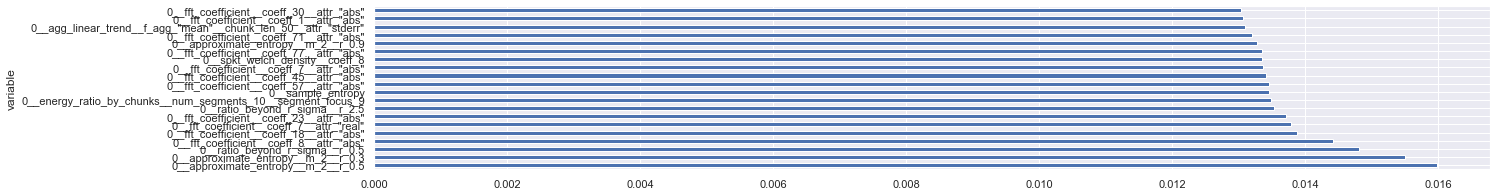

In [407]:
# Use feature_importances of tree based classifiers 
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [408]:
feat_importances.nlargest(20).index

Index(['0__approximate_entropy__m_2__r_0.5',
       '0__approximate_entropy__m_2__r_0.3', '0__ratio_beyond_r_sigma__r_0.5',
       '0__fft_coefficient__coeff_8__attr_"abs"',
       '0__fft_coefficient__coeff_18__attr_"abs"',
       '0__fft_coefficient__coeff_7__attr_"real"',
       '0__fft_coefficient__coeff_23__attr_"abs"',
       '0__ratio_beyond_r_sigma__r_2.5',
       '0__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
       '0__sample_entropy', '0__fft_coefficient__coeff_57__attr_"abs"',
       '0__fft_coefficient__coeff_45__attr_"abs"',
       '0__fft_coefficient__coeff_7__attr_"abs"',
       '0__spkt_welch_density__coeff_8',
       '0__fft_coefficient__coeff_77__attr_"abs"',
       '0__approximate_entropy__m_2__r_0.9',
       '0__fft_coefficient__coeff_71__attr_"abs"',
       '0__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"',
       '0__fft_coefficient__coeff_1__attr_"abs"',
       '0__fft_coefficient__coeff_30__attr_"abs"'],
      dtype='object', name

In [409]:
cols = ['0__approximate_entropy__m_2__r_0.3',
       '0__approximate_entropy__m_2__r_0.5',
       '0__fft_coefficient__coeff_8__attr_"abs"',
       '0__fft_coefficient__coeff_7__attr_"real"',
       '0__fft_coefficient__coeff_23__attr_"abs"',
       '0__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
       '0__fft_coefficient__coeff_7__attr_"abs"',
       '0__ratio_beyond_r_sigma__r_0.5',
       '0__fft_coefficient__coeff_45__attr_"abs"',
       '0__approximate_entropy__m_2__r_0.7',
       '0__approximate_entropy__m_2__r_0.1',
       '0__fft_coefficient__coeff_1__attr_"abs"',
       '0__fft_coefficient__coeff_18__attr_"abs"',
       '0__fft_coefficient__coeff_57__attr_"abs"',
       '0__fft_coefficient__coeff_77__attr_"abs"',
       '0__fft_coefficient__coeff_28__attr_"abs"',
       '0__fft_coefficient__coeff_15__attr_"abs"',
       '0__approximate_entropy__m_2__r_0.9',
       '0__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"',
       '0__fft_coefficient__coeff_79__attr_"abs"']

In [410]:
X_train_1 = X_train[cols]

X_test_1 = X_test[cols]

new_test_1= new_test[cols]

## XGBOOST

In [134]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [448]:
def modelfit(alg, data_train, data_test, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(data_train[predictors].values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    
    #Fit the algorithm to the data
    alg.fit(data_train[predictors], y_train,eval_metric='auc')
        
    #Predict training set:
    data_train_predictions = alg.predict(data_train[predictors])
    data_train_predprob = alg.predict_proba(data_train[predictors])[:,1]
        
    
    #Predict testing set:
    data_test_predictions = alg.predict(data_test[predictors])
    data_test_predprob = alg.predict_proba(data_test[predictors])[:,1]
    print( 'AUC Score (Test): %f' % metrics.roc_auc_score(y_test, data_test_predprob))
       
    
    feature_importance = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_importance.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.rcParams["figure.figsize"] = (20,3)

AUC Score (Test): 0.580502


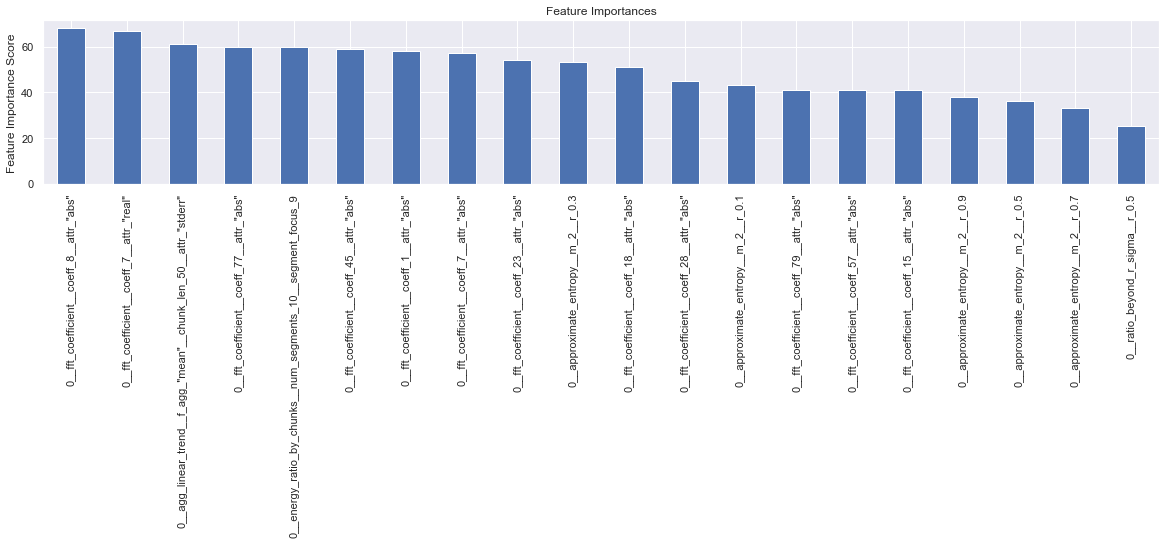

In [449]:
from xgboost import XGBClassifier

predictors = X_train_1.columns
xgb_1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

modelfit(xgb_1, X_train_1, X_test_1, predictors)

In [445]:
# Choosing max_depth and min_child_weight parameters.
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,9,5),
 'min_child_weight':range(1,4,7)}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,  seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([1.68446765, 3.80268641]),
  'std_fit_time': array([0.17633243, 1.24587645]),
  'mean_score_time': array([0.00991035, 0.00951381]),
  'std_score_time': array([0.00240249, 0.00241857]),
  'param_max_depth': masked_array(data=[3, 8],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 1],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 3, 'min_child_weight': 1},
   {'max_depth': 8, 'min_child_weight': 1}],
  'split0_test_score': array([0.56627342, 0.55211909]),
  'split1_test_score': array([0.57442925, 0.55877572]),
  'split2_test_score': array([0.55975094, 0.53872746]),
  'split3_test_score': array([0.5795554, 0.5724663]),
  'split4_test_score': array([0.56915306, 0.55396839]),
  'mean_test_score': array([0.56983241, 0.55521139]),
  'std_test_score': array([0.00678869, 0.01089278]),
  'rank_test_score': arra

In [414]:
param_test2 = {
 'max_depth':[1,2,3,4,5,6,7],
 'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([0.90814476, 0.88943272, 0.80898943, 1.25334206, 1.18684564,
         1.2249496 , 1.92424936, 1.66786757, 1.62985897, 2.43717432,
         2.64321504, 2.44057145, 2.90955997, 2.76860766, 2.64085798,
         3.6393312 , 3.26978712, 3.36142263, 4.73078103, 4.12489915,
         3.52175379]),
  'std_fit_time': array([0.02305674, 0.05627192, 0.00725855, 0.03186456, 0.02149373,
         0.01447315, 0.10607604, 0.04846351, 0.06335049, 0.10096824,
         0.23868841, 0.24024482, 0.05519909, 0.03015112, 0.05272925,
         0.17150601, 0.051213  , 0.15548868, 0.11406218, 0.16653902,
         0.75019684]),
  'mean_score_time': array([0.00757241, 0.00540419, 0.00642657, 0.00599794, 0.00633988,
         0.0062932 , 0.00688577, 0.00595789, 0.0074625 , 0.00939178,
         0.00812044, 0.00716739, 0.00743752, 0.00806198, 0.00757098,
         0.0117857 , 0.00790634, 0.01128759, 0.01039953, 0.01019583,
         0.00787945]),
  'std_score_time': array([0.00161409, 0.00032256, 

### Gamma Parameter

In [416]:
# Choosing gamma parameter
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[predictors],y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([2.7779099 , 2.46685381, 2.49859748, 2.60752916, 2.32289414]),
  'std_fit_time': array([0.15821641, 0.02174751, 0.03716492, 0.04009791, 0.74391884]),
  'mean_score_time': array([0.00849886, 0.00691447, 0.00838194, 0.00742145, 0.00761757]),
  'std_score_time': array([0.00173878, 0.0008207 , 0.0014002 , 0.00072389, 0.00127175]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.56922432, 0.5746885 , 0.5800964 , 0.58541678, 0.57775819]),
  'split1_test_score': array([0.56112625, 0.57057213, 0.57034708, 0.55444975, 0.56871546]),
  'split2_test_score': array([0.53938386, 0.54722938, 0.55134905, 0.55219924, 0.55479358]),
  'split3_test_score': array([0.56887175, 0.55883199, 0.57312895, 0.58668825, 0.58826361]),

AUC Score (Test): 0.585822


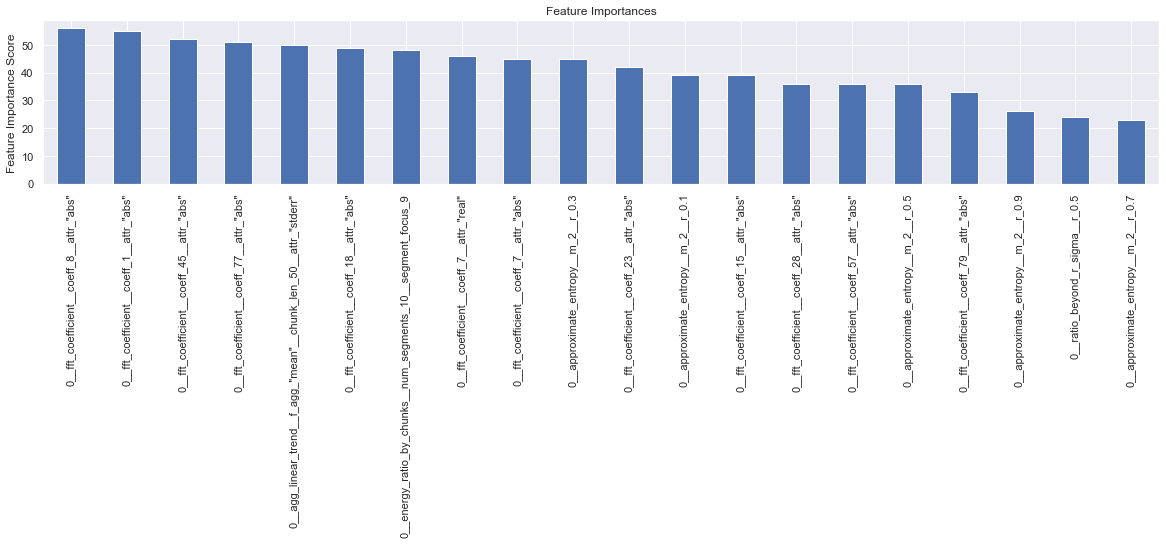

In [420]:
xgb_2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_2, X_train_1, X_test_1, predictors)

In [446]:
# Choosing the best values for 'subsample' and 'colsample_bytree'.
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[predictors],y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([2.69343939, 2.64535241, 3.14691777, 3.31688919, 3.32731829,
         3.37909384, 3.70940118, 3.40050788, 3.24208202, 3.33263025,
         3.47444677, 3.52976022, 3.47572742, 3.70708222, 3.76948342,
         3.84484196]),
  'std_fit_time': array([0.04034835, 0.05465925, 0.382363  , 0.03778169, 0.10771226,
         0.35995422, 0.0861825 , 0.09196406, 0.04554131, 0.02333529,
         0.09172509, 0.03181071, 0.07739203, 0.06723183, 0.01796983,
         0.05159402]),
  'mean_score_time': array([0.00750165, 0.00889516, 0.01014152, 0.00928183, 0.00880227,
         0.00964808, 0.00908523, 0.00833545, 0.00740619, 0.00814891,
         0.00858045, 0.00832977, 0.00870023, 0.0099185 , 0.00893459,
         0.00819101]),
  'std_score_time': array([0.00032303, 0.00105533, 0.00085439, 0.00118433, 0.00118167,
         0.00208292, 0.00293046, 0.00209746, 0.00034616, 0.00101612,
         0.00125568, 0.00106491, 0.00137053, 0.0014881 , 0.00082172,
         0.00163574]),
  'param_c

In [422]:
# Since our best performing values are 'colsample_bytree': 0.6 and 'subsample': 0.9. Let's try with more values close
# to these numbers. After re-running the grid search we obtain values of 0.75 and 0.75 that are very close to 
# the 0.8 value.
param_test5 = {
 'subsample':[i/100.0 for i in range(55,80,5)],
 'colsample_bytree':[i/100.0 for i in range(55,95,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train[predictors],y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([2.47032762, 2.7355967 , 2.72186804, 2.72278829, 2.78061895,
         2.8115345 , 2.80351305, 3.0918776 , 3.14464784, 3.33239923,
         3.13591266, 3.12527204, 3.33657894, 3.30281825, 3.44976921,
         3.28853502, 3.46409359, 3.43179002, 3.27763429, 3.17719307,
         2.98481688, 3.12696662, 3.2548305 , 3.31671014, 3.27964902,
         3.18024478, 3.30672703, 3.33822012, 3.50635381, 3.47407727,
         3.17967358, 3.39549427, 3.37455363, 3.4304646 , 3.58611479,
         3.33931594, 3.42638445, 3.43390808, 3.45792747, 3.43726106]),
  'std_fit_time': array([0.04960382, 0.23349919, 0.22127077, 0.0658177 , 0.05971665,
         0.12141443, 0.1160902 , 0.08983028, 0.0849786 , 0.06512901,
         0.03126649, 0.02323507, 0.02797017, 0.02374871, 0.06231001,
         0.05776574, 0.15268442, 0.22312062, 0.10323706, 0.08401191,
         0.0097427 , 0.11802196, 0.01805859, 0.03554962, 0.0364928 ,
         0.07694932, 0.12486502, 0.03213602, 0.12974801, 0.14301513,

#### Regularization Parameters

In [359]:
# Let's try different values for Reg_alpha parameter.
param_test6 = {
 'reg_alpha':[0, 0.001, 1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.75, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train[predictors],y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([2.98387299, 2.9449019 , 3.02551455, 3.00928397, 3.04683752,
         3.02608428, 0.80408664]),
  'std_fit_time': array([0.02549252, 0.04783209, 0.09889584, 0.06084176, 0.05287703,
         0.05556216, 0.05891697]),
  'mean_score_time': array([0.00811195, 0.00966892, 0.0073719 , 0.0089674 , 0.00762258,
         0.00696459, 0.0052176 ]),
  'std_score_time': array([0.00232568, 0.00199388, 0.00113086, 0.00165155, 0.00044055,
         0.00055201, 0.00045181]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.58245338, 0.57311302, 0.58245338, 0.57863658, 0.57501985,
         0.56223468, 0.5       ]),
  'split1_test

In [360]:
# We can see that the best reg-alpha = 0
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train[predictors],y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([3.51074848, 3.02196007, 3.04805241, 3.10507779, 2.71771441]),
  'std_fit_time': array([0.26494881, 0.06120888, 0.04793191, 0.06851833, 0.95231065]),
  'mean_score_time': array([0.00810184, 0.00869937, 0.00823698, 0.00863938, 0.00828776]),
  'std_score_time': array([0.00122984, 0.00192942, 0.00117284, 0.00055923, 0.00241737]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.58245338, 0.57311302, 0.5782771 , 0.57863658, 0.57070603]),
  'split1_test_score': array([0.5597947 , 0.5597947 , 0.54824836, 0.55631267, 0.546648  ]),
  'split2_test_score': array([0.57873647, 0.56946563, 0.56347678, 0.56307044, 0.56712135]),
  'split3_test_score': array([0.57142857, 0.56555225, 0.584

AUC Score (Test): 0.585822


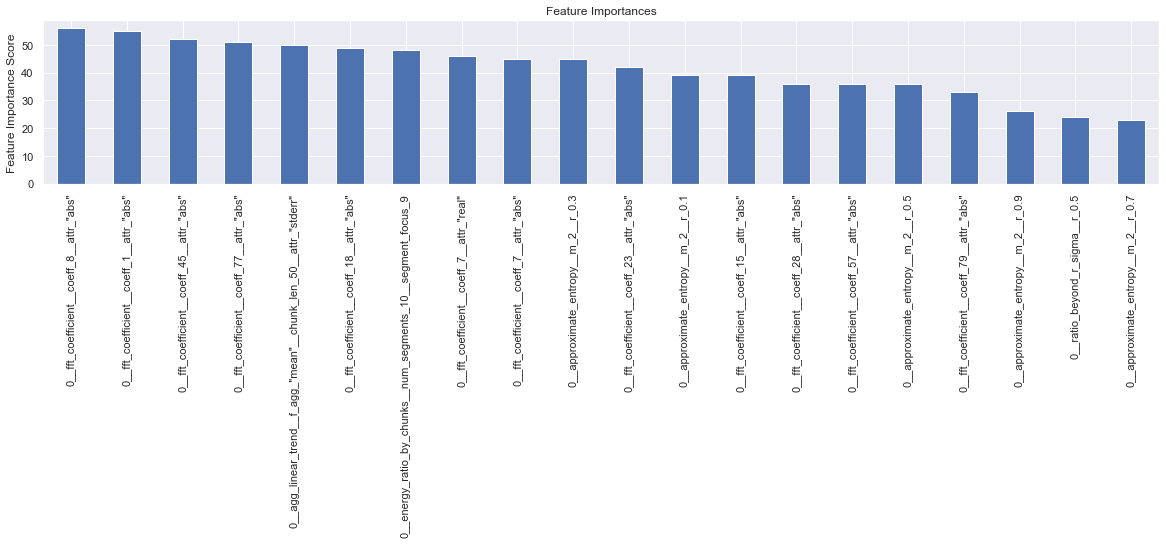

In [425]:
xgb_3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)
modelfit(xgb_3, X_train_1,X_test_1, predictors)

#### Learning Rate

AUC Score (Test): 0.585822


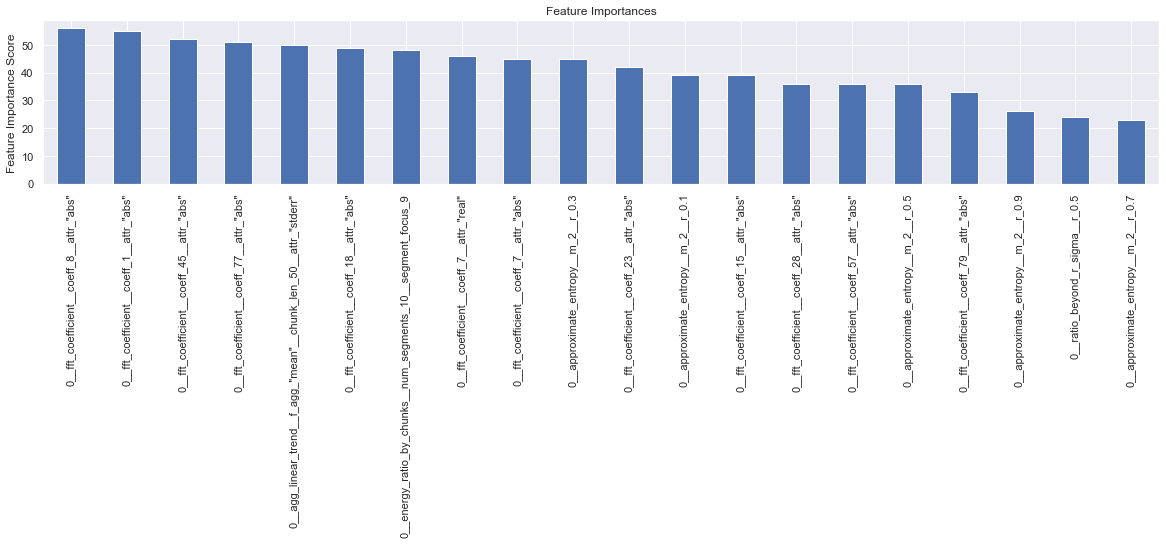

In [440]:
# The best result is with a learning rate = 0.1
xgb_4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)
modelfit(xgb_4, X_train_1, X_test_1, predictors)

### Final Prediction

In [434]:
#Predict on testing data:
new_test_1['predprob'] = xgb_4.predict_proba(new_test_1[predictors])[:,1]


/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [435]:
# Convert the probabilities into a binary class of 0 or 1 by a decision threshold.
import statistics 
predictions= new_test_1['predprob']
#statistics.mean(new_test_1['predprob'])

In [432]:
#threshold = 0.494
#predictions_label= (new_test_1['predprob'] > threshold).astype(np.int)
#predictions_label

id
0       0
1       1
2       1
3       1
4       0
       ..
4995    1
4996    0
4997    0
4998    1
4999    1
Name: predprob, Length: 5000, dtype: int64

In [438]:
prediction = pd.DataFrame(predictions).to_csv('prediction.csv')